In [83]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 2]
plt.rcParams['axes.grid'] = True
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)
pd.set_option('display.max_rows', 200)
from tqdm.notebook import tqdm

### Valuations

# StockTwits Scraper?

The Stocktwits API only allows clients to make a limited number of calls in a given hour. The default rate limit for calls to the REST API varies depending on the authorization method being used and whether the method itself requires authentication.

In [ ]:
ST_ACCESS_TOKEN

# Reddit Scraping

In [18]:
personal_use_script = 'DJS8PFfJM0l7oQ'
secret = 'TIi--cOmkC2wlw33H-dRZ7OkWohcjg'

In [22]:
import praw
import pandas as pd
import datetime as dt

In [ ]:
reddit = praw.Reddit(client_id=personal_use_script, \
                     client_secret=secret, \
                     user_agent='text_analysis', \
                     username='xxxxxxxxx', \
                     password='xxxxxxxxx')
sr = reddit.subreddit('wallstreetbets')

In [215]:
s._fetch()

In [90]:
import datetime as dt

In [208]:
topics_dict = { "timestamp": [],
                "title":[],
                "score":[],
                "id":[], "url":[], 
                "comms_num": [],
                "created": [],
                "body":[],
                "num_awards": [],
               "category": [],
               "num_comments": [],
               "num_crossposts": [],
               "num_reports": [],
               "downs": [],
               "ups": [],
               "upvote_ratio": [],
               "num_mod_reports": [],
              }

for s in tqdm(sr.top(limit=5), total=5):
    topics_dict["timestamp"].append(dt.datetime.fromtimestamp(s.created_utc))
    topics_dict["title"].append(s.title)
    topics_dict["score"].append(s.score)
    topics_dict["id"].append(s.id)
    topics_dict["url"].append(s.url)
    topics_dict["comms_num"].append(s.num_comments)
    topics_dict["created"].append(s.created)
    topics_dict["body"].append(s.selftext)
    topics_dict["num_awards"].append(s.total_awards_received)
    topics_dict["category"].append(s.category)
    topics_dict["num_comments"].append(s.num_comments)
    topics_dict["num_crossposts"].append(s.num_crossposts)
    topics_dict["num_reports"].append(s.num_reports)
    topics_dict["downs"].append(s.downs)
    topics_dict["ups"].append(s.ups)
    topics_dict["upvote_ratio"].append(s.upvote_ratio)
    topics_dict["num_mod_reports"].append(len(s.mod_reports))

In [210]:
pd.DataFrame(topics_dict)

,timestamp,title,score,id,url,comms_num,created,body,num_awards,category,num_comments,num_crossposts,num_reports,downs,ups,upvote_ratio,num_mod_reports
0,2020-05-11 20:41:17,"Elon has transcended time, space, and county r...",80593,ghw12u,https://i.redd.it/frcjfc2967y41.jpg,4919,1.589258e+09,,30,None,4919,11,None,0,80593,0.90,0
1,2020-06-12 22:00:23,"BREAKING: CNBC Officially Gives Up, Stocks Ent...",69833,h7u3ea,https://i.redd.it/u5odjw2jxj451.jpg,1518,1.592028e+09,,19,None,1518,10,None,0,69833,0.96,0
2,2020-04-21 01:18:21,How to get oil back up,67103,g55or2,https://i.redd.it/w5iqqihjo2u41.jpg,564,1.587461e+09,,6,None,564,12,None,0,67103,0.97,0
3,2020-06-12 12:05:08,I guess they didn’t like my “printer goes brrr...,65647,h7jgr8,https://i.redd.it/wuyb92zbzg451.jpg,1048,1.591992e+09,,26,None,1048,2,None,0,65647,0.95,0
4,2020-08-06 09:53:52,100% Accurate,63036,i4ox8e,https://i.redd.it/owfmwy3xtcf51.png,453,1.596736e+09,,10,None,453,5,None,0,63036,0.96,0


# Yahoo Finance

In [ ]:
import yfinance as yf 
x = yf.Ticker("aapl")

In [61]:
cols = sorted([x for x in dir(x) if '_' != x[0]])

### Actions

In [82]:
x.actions.tail()

,Dividends,Stock Splits
Date,,
2020-02-07,0.1925,0.0
2020-05-08,0.2050,0.0
2020-08-07,0.2050,0.0
2020-08-31,0.0000,4.0
2020-11-06,0.2050,0.0


### Balance Sheets

In [84]:
x.balancesheet

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [83]:
x.balance_sheet

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


### Calendar

In [85]:
x.calendar

,Value
Earnings Date,2021-01-27 00:00:00
Earnings Average,1.40
Earnings Low,1.23
Earnings High,1.57
Revenue Average,102458000000
Revenue Low,97739000000
Revenue High,110211000000


### Cashflows

In [86]:
x.cashflow

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


### Dividends

<AxesSubplot:xlabel='Date'>

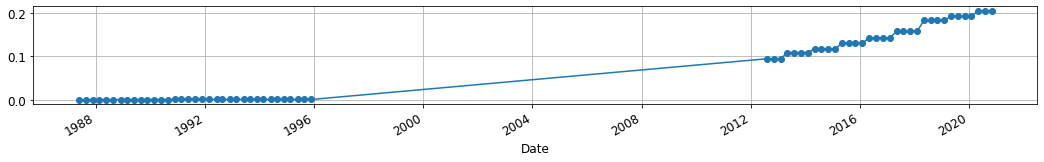

In [78]:
# show splits
ax = plt.figure()
x.dividends.plot(marker='o')

### Earnings

In [87]:
x.earnings

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


### Financials

In [91]:
x.financials

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


### History

In [192]:
x.history().iloc[[1, -1], :]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-16,127.410004,128.369995,126.559998,127.809998,98208600,0,0
2021-01-14,130.800003,131.000000,128.759995,128.910004,89979900,0,0


### Info

In [104]:
pd.Series(x.info)

zip                                                                         95014
sector                                                                 Technology
fullTimeEmployees                                                          147000
longBusinessSummary             Apple Inc. designs, manufactures, and markets ...
city                                                                    Cupertino
phone                                                                408-996-1010
state                                                                          CA
country                                                             United States
companyOfficers                                                                []
website                                                      http://www.apple.com
maxAge                                                                          1
address1                                                       One Apple Park Way
industry        

### Institutional Holders

In [105]:
x.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1280669129,2020-09-29,0.0761,148314291829
1,Blackrock Inc.,1069771045,2020-09-29,0.0636,123890184721
2,"Berkshire Hathaway, Inc",944295554,2020-09-29,0.0561,109358868108
3,State Street Corporation,672444836,2020-09-29,0.0400,77875836457
4,"FMR, LLC",346699497,2020-09-29,0.0206,40151268747
5,"Geode Capital Management, LLC",247838449,2020-09-29,0.0147,28702170778
6,Price (T.Rowe) Associates Inc,228869394,2020-09-29,0.0136,26505364519
7,Northern Trust Corporation,210830547,2020-09-29,0.0125,24416285648
8,Norges Bank Investment Management,187425092,2019-12-30,0.0111,13759344566
9,Bank Of New York Mellon Corporation,166053767,2020-09-29,0.0099,19230686756


### isin

In [107]:
x.isin

'US0378331005'

### major Shareholders

In [218]:
print("Floating stock is the number of shares available for trading of a particular stock. \n"+
      "Low float stocks are those with a low number of shares.\n")
print("Floating Stock = Outstanding Shares - (Closely held shares + Restricted Stocks)")
print("\n*Closely-held shares* are those owned by insiders, major shareholders, and employees. "+
      "\n*Restricted stock* refers to insider shares that cannot be traded because of a temporary restriction, "+
      "such as the lock-up period after an initial public offering (IPO).")
print("\nA stock with a small float will generally be more volatile than a stock with a large float. "+
      "This is because, with fewer shares available, it may be harder to find a buyer or seller. "+
      "This results in larger spreads and often lower volume.")

Floating stock is the number of shares available for trading of a particular stock. 
Low float stocks are those with a low number of shares.

Floating Stock = Outstanding Shares - (Closely held shares + Restricted Stocks)

*Closely-held shares* are those owned by insiders, major shareholders, and employees. 
*Restricted stock* refers to insider shares that cannot be traded because of a temporary restriction, such as the lock-up period after an initial public offering (IPO).

A stock with a small float will generally be more volatile than a stock with a large float. This is because, with fewer shares available, it may be harder to find a buyer or seller. This results in larger spreads and often lower volume.


In [197]:
x.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,59.66%,% of Shares Held by Institutions
2,59.70%,% of Float Held by Institutions
3,4453,Number of Institutions Holding Shares


### mutualfunds

In [222]:
x.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,431644405,2020-09-29,0.0257,49988738543
1,Vanguard 500 Index Fund,329795426,2020-09-29,0.0196,38193608285
2,SPDR S&P 500 ETF Trust,167787410,2020-12-30,0.0100,22263711432
3,Fidelity 500 Index Fund,145951138,2020-11-29,0.0087,17375482978
4,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",140388742,2020-12-30,0.0083,18628182175
5,Vanguard Institutional Index Fund-Institutiona...,137973687,2020-09-29,0.0082,15978732691
6,Vanguard Growth Index Fund,121939819,2020-09-29,0.0072,14121850438
7,iShares Core S&P 500 ETF,120275076,2020-12-30,0.0071,15959299834
8,Vanguard Information Technology Index Fund,79770560,2020-08-30,0.0047,10293593062
9,Select Sector SPDR Fund-Technology,65335080,2020-12-30,0.0039,8669311765


### option_chain

In [130]:
x.options

('2021-01-15',
 '2021-01-22',
 '2021-01-29',
 '2021-02-05',
 '2021-02-12',
 '2021-02-19',
 '2021-02-26',
 '2021-03-19',
 '2021-04-16',
 '2021-06-18',
 '2021-07-16',
 '2021-09-17',
 '2022-01-21',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17')

In [228]:
print('Last Closing Price:', x.history().iloc[-1].Close)

Last Closing Price: 128.91000366210938


In [249]:
calls = x.option_chain(date='2021-01-15').calls

In [245]:
puts = x.option_chain(date='2021-01-29').puts

In [250]:
calls.tail()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
191,AAPL210115C00720000,2020-08-28 19:59:13,720.0,9.20,8.95,9.50,-1.150001,-11.111116,104,843.0,21.982425,False,REGULAR,USD
192,AAPL210115C00740000,2020-08-28 19:06:20,740.0,8.36,8.00,8.45,-0.640000,-7.111115,33,NaN,21.613284,False,REGULAR,USD
193,AAPL210115C00800000,2020-08-28 19:59:49,800.0,6.25,6.00,6.45,-0.600000,-8.759123,173,206.0,20.916996,False,REGULAR,USD
194,AAPL210115C00900000,2020-08-28 19:58:41,900.0,4.30,4.15,4.60,-0.580000,-11.885244,76,14.0,20.355472,False,REGULAR,USD
195,AAPL210115C01000000,2020-08-28 19:55:55,1000.0,3.35,3.35,3.50,-0.450000,-11.842107,547,782.0,20.212894,False,REGULAR,USD


In [244]:
calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL210129C00065000,2021-01-11 14:30:00,65.0,63.45,0.0,0.00,0.0,0.0,62,0,0.000010,True,REGULAR,USD
1,AAPL210129C00070000,2021-01-08 20:56:43,70.0,57.50,0.0,0.00,0.0,0.0,21,0,0.000010,True,REGULAR,USD
2,AAPL210129C00075000,2021-01-07 20:23:49,75.0,54.95,0.0,0.00,0.0,0.0,1,0,0.000010,True,REGULAR,USD
3,AAPL210129C00080000,2021-01-12 19:01:50,80.0,48.49,0.0,0.00,0.0,0.0,6,0,0.000010,True,REGULAR,USD
4,AAPL210129C00085000,2021-01-12 17:40:35,85.0,42.95,43.6,44.65,0.0,0.0,2,1,1.052739,True,REGULAR,USD


In [131]:
x.quarterly_balance_sheet

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [132]:
x.quarterly_balancesheet

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [133]:
x.quarterly_earnings

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [134]:
x.quarterly_cashflow

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [135]:
x.quarterly_financials

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [151]:
x.recommendations['To Grade'].value_counts()

Buy                  297
Outperform           149
Overweight           113
Neutral               78
Hold                  39
Market Perform        23
Equal-Weight          17
Strong Buy             8
Sell                   7
Sector Perform         4
Positive               4
Market Outperform      3
                       3
Perform                2
Sector Outperform      2
Sector Weight          2
Negative               1
Reduce                 1
Long-Term Buy          1
Underweight            1
Long-term Buy          1
Underperform           1
Equal-weight           1
Name: To Grade, dtype: int64

In [129]:
x.sustainability

,Value
2020-10,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,12.98
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [144]:
x.ticker

'AAPL'

### Splits

(0.0, 8.0)

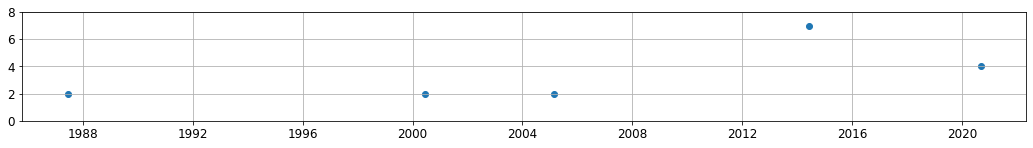

In [57]:
# show splits
ax = plt.figure()
plt.scatter(x=x.splits.index, y=x.splits.values);
plt.ylim([0, x.splits.values.max()+1])

# InstaPy

In [8]:
from usd_swaps.signals.cftc.cftc_signal import load_cftc_data

In [14]:
from grpc._channel import _InactiveRpcError

In [17]:
try:
    df = load_cftc_data('2021-05-01')
except _InactiveRpcError:
    print("Nope")
df

,ric,Instrument,Exchange,Contract_Size,Contract_Units,As_of_Date,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,Dealer_Positions_Long_All,Dealer_Positions_Short_All,Dealer_Positions_Spread_All,Asset_Mgr_Positions_Long_All,Asset_Mgr_Positions_Short_All,Asset_Mgr_Positions_Spread_All,Lev_Money_Positions_Long_All,Lev_Money_Positions_Short_All,Lev_Money_Positions_Spread_All,Other_Rept_Positions_Long_All,Other_Rept_Positions_Short_All,Other_Rept_Positions_Spread_All,Tot_Rept_Positions_Long_All,Tot_Rept_Positions_Short_All,NonRept_Positions_Long_All,NonRept_Positions_Short_All,Change_in_Open_Interest_All,Change_in_Dealer_Long_All,Change_in_Dealer_Short_All,Change_in_Dealer_Spread_All,Change_in_Asset_Mgr_Long_All,Change_in_Asset_Mgr_Short_All,Change_in_Asset_Mgr_Spread_All,Change_in_Lev_Money_Long_All,Change_in_Lev_Money_Short_All,Change_in_Lev_Money_Spread_All,Change_in_Other_Rept_Long_All,Change_in_Other_Rept_Short_All,Change_in_Other_Rept_Spread_All,...,Pct_of_OI_Lev_Money_Long_All,Pct_of_OI_Lev_Money_Short_All,Pct_of_OI_Lev_Money_Spread_All,Pct_of_OI_Other_Rept_Long_All,Pct_of_OI_Other_Rept_Short_All,Pct_of_OI_Other_Rept_Spread_All,Pct_of_OI_Tot_Rept_Long_All,Pct_of_OI_Tot_Rept_Short_All,Pct_of_OI_NonRept_Long_All,Pct_of_OI_NonRept_Short_All,Traders_Tot_All,Traders_Dealer_Long_All,Traders_Dealer_Short_All,Traders_Dealer_Spread_All,Traders_Asset_Mgr_Long_All,Traders_Asset_Mgr_Short_All,Traders_Asset_Mgr_Spread_All,Traders_Lev_Money_Long_All,Traders_Lev_Money_Short_All,Traders_Lev_Money_Spread_All,Traders_Other_Rept_Long_All,Traders_Other_Rept_Short_All,Traders_Other_Rept_Spread_All,Traders_Tot_Rept_Long_All,Traders_Tot_Rept_Short_All,Conc_Gross_LE_4_TDR_Long_All,Conc_Gross_LE_4_TDR_Short_All,Conc_Gross_LE_8_TDR_Long_All,Conc_Gross_LE_8_TDR_Short_All,Conc_Net_LE_4_TDR_Long_All,Conc_Net_LE_4_TDR_Short_All,Conc_Net_LE_8_TDR_Long_All,Conc_Net_LE_8_TDR_Short_All,CFTC_Contract_Market_Code_Quotes,CFTC_Market_Code_Quotes,CFTC_Commodity_Code_Quotes,CFTC_SubGroup_Code,FutOnly_or_Combined,Report_Date,bbg_ticker
2010-07-23,None,S&P 500 Consolidated,CHICAGO MERCANTILE EXCHANGE,250.0,(S&P 500 INDEX X $250.00),2010-07-20,13874+,CME,0,138,870890,69325,213533,38686,439798,163886,55169,71078,207667,39798,15780,26039,407,730040,745185,140850,125705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.2,23.8,4.6,1.8,3.0,0.0,83.8,85.6,16.2,14.4,515,31,51,14,114,68,61,71,141,59,18,21,7,312,344,18.4,11.0,28.7,19.5,15.4,9.9,24.3,16.7,13874+,CME,138,F20,FutOnly,2010-07-20,None
2010-07-23,None,S&P GSCI COMMODITY INDEX,CHICAGO MERCANTILE EXCHANGE,250.0,(GSCI X $250),2010-07-20,256741,CME,0,256,16223,1184,13486,1,11368,288,0,2644,1456,0,0,0,0,15197,15231,1026,992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.3,9.0,0.0,0.0,0.0,0.0,93.7,93.9,6.3,6.1,26,.,.,.,9,.,0,5,6,0,0,0,0,18,9,62.5,89.9,75.7,93.3,62.5,89.9,75.7,93.2,256741,CME,256,F90,FutOnly,2010-07-20,None
2010-07-23,None,10-YEAR U.S. TREASURY NOTES,CHICAGO BOARD OF TRADE,100000.0,"(CONTRACTS OF $100,000 FACE VALUE)",2010-07-20,043602,CBT,0,43,1843850,117591,317047,35099,964931,412708,187364,181430,487297,30505,39820,47360,7453,1564193,1524833,279657,319017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.8,26.4,1.7,2.2,2.6,0.4,84.8,82.7,15.2,17.3,254,34,31,16,36,50,51,29,62,31,6,6,4,165,191,44.5,20.1,51.1,30.0,42.1,18.8,47.9,26.5,043602,CBT,43,F30,FutOnly,2010-07-20,TYA
2010-07-23,EUR=,EURO FX,CHICAGO MERCANTILE EXCHANGE,125000.0,"(CONTRACTS OF EUR 125,000)",2010-07-20,099741,CME,0,99,230118,112272,64768,3933,20577,23107,3410,30298,71049,1689,15410,10830,288,187877,179074,42241,51044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.2,30.9,0.7,6.7,4.7,0.1,81.6,77.8,18.4,22.2,156,23,13,6,14,18,7,32,39,20,8,9,.,87,104,39.9,35.6,49.3,42.7,39.7,35.6,48.2,42.7,099741,CME,99,F10,FutOnly,2010-07-20,EUR BGN Curncy
2010-07-23,None,LONG-TERM U.S. TREASURY BONDS,CHICAGO BOARD OF TRADE,100000.0,"(CONTRACTS OF $100,000 FACE VALUE)

In [6]:
InstaPy(username="abcd", 
        password="1234")

NameError: name 'InstaPy' is not defined